In [1]:
import sys, os
path = "/content/drive/MyDrive/Colab Notebooks/밑바닥부터 시작하는 딥려닝/deep-learning-from-scratch-master/ch06"
parent = os.path.join(path, os.pardir)
sys.path.append(os.path.abspath(parent))

# Chapter6.학습 관련 기술들

## 6.1 매개변수 갱신

### 6.1.2 확률적 경사 하강법(SGD)

In [2]:
class SGD:
  def __init__(self, lr=0.01):
    	self.lr = lr
   
  def update(self, params, grads):
    	for key in params.keys():
        	params[key] -= self.lr * grads[key]

In [ ]:
network = TwoLayerNet(...)
optimizer = SGD()

for i in range(10000):
  ...
  x_batch, t_batch = get_mini_batch(...) # 미니배치
  grads = network.gradient(x_batch, t_batch)
  params = network.params
  optimizer.update(params, grads)
  ...
  

### 6.1.4 모멘텀

In [4]:
import numpy as np

class Momentum:
  def __init__(self, lr=0.01, momentum=0.9):
    self.lr = lr
    self.momentum = momentum
    self.v = None
  
  def update(self, params, grads):
    if self.v is None:
      self.v = {}
      for key, val in params.items():
        self.v[key] = np.zeros_like(val)
    
    for key in params.keys():
      self.v[key] = self.momentum*self.v[key] - self.lr*grads[key]
      params[key] += self.v[key]

### 6.1.5 AdaGrad

In [5]:
class AdaGrad:
  def __init__(self, lr=0.01):
    self.lr = lr
    self.h = None

  def update(self, params, grads):
    if self.h is None:
      self.h = {}
      for key, val in params.items():
        self.h[key] = np.zeros_like(val)
    
    for key in params.keys():
      self.h[key] += grads[key] * grads[key]
      params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

In [6]:
import numpy as np

class SGD:

    """확률적 경사 하강법（Stochastic Gradient Descent）"""

    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key] 


class Momentum:

    """모멘텀 SGD"""

    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():                                
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key] 
            params[key] += self.v[key]


class Nesterov:

    """Nesterov's Accelerated Gradient (http://arxiv.org/abs/1212.0901)"""
    # NAG는 모멘텀에서 한 단계 발전한 방법이다. (http://newsight.tistory.com/224)
    
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.v[key] *= self.momentum
            self.v[key] -= self.lr * grads[key]
            params[key] += self.momentum * self.momentum * self.v[key]
            params[key] -= (1 + self.momentum) * self.lr * grads[key]


class AdaGrad:

    """AdaGrad"""

    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)


class RMSprop:

    """RMSprop"""

    def __init__(self, lr=0.01, decay_rate = 0.99):
        self.lr = lr
        self.decay_rate = decay_rate
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] *= self.decay_rate
            self.h[key] += (1 - self.decay_rate) * grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)


class Adam:

    """Adam (http://arxiv.org/abs/1412.6980v8)"""

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            
            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)

### 6.1.7 어느 갱신 방법을 이용할 것인가?

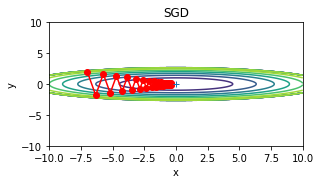

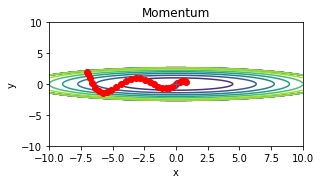

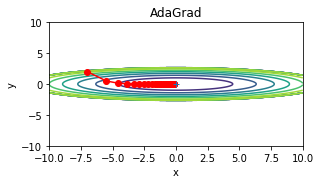

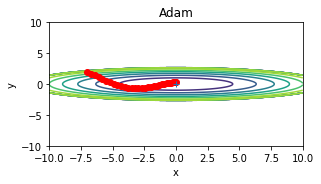

In [7]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # 외곽선 단순화
    mask = Z > 7
    Z[mask] = 0
    
    # 그래프 그리기
    plt.figure(figsize=(10,5))
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

### 6.1.8 MNIST 데이터셋으로 본 갱신 방법 비교

===========iteration:0===========
SGD:2.322709187290037
Momentum:2.5522374458348187
AdaGrad:2.1060917567234987
Adam:2.2444479116670983
===========iteration:100===========
SGD:1.477705651162145
Momentum:0.20942386201102808
AdaGrad:0.10846149523742141
Adam:0.17972266351162872
===========iteration:200===========
SGD:0.7100222694549314
Momentum:0.2293661901530034
AdaGrad:0.08009402645688787
Adam:0.17049810213210664
===========iteration:300===========
SGD:0.4946451879499665
Momentum:0.1953622147249808
AdaGrad:0.07763425609400143
Adam:0.14611629208312582
===========iteration:400===========
SGD:0.46611585743156037
Momentum:0.17499763365965726
AdaGrad:0.0832000062278577
Adam:0.10775959316028641
===========iteration:500===========
SGD:0.27509197540334207
Momentum:0.11457639173184758
AdaGrad:0.04732934803602116
Adam:0.08072320239922623
===========iteration:600===========
SGD:0.4162841836702969
Momentum:0.1455493726077411
AdaGrad:0.09660144194400572
Adam:0.09510555209780577
===========iteration:7

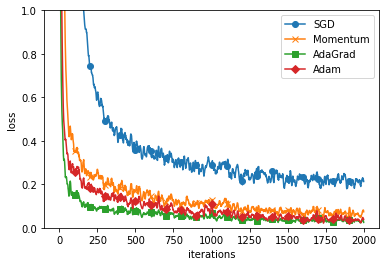

In [8]:
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

## 6.2 가중치의 초깃값

### 6.2.2 은닉층의 활성화값 분포

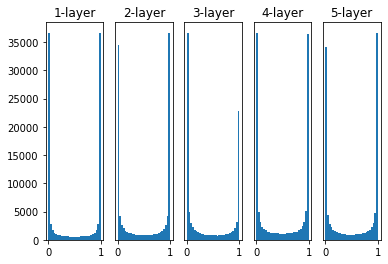

In [9]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

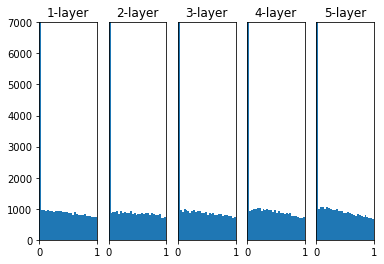

In [10]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    # w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    # z = sigmoid(a)
    z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    plt.xlim(0.0, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

### 6.2.4 MNIST 데이터셋으로 본 가중치 초깃값 비교

===========iteration:0===========
std=0.01:2.3025451897505786
Xavier:2.306856508561269
He:2.324299304724728
===========iteration:100===========
std=0.01:2.301323213445643
Xavier:2.2274818452525147
He:1.5053709821667725
===========iteration:200===========
std=0.01:2.3027495264298143
Xavier:2.120343920191588
He:0.8624415433774029
===========iteration:300===========
std=0.01:2.3030361077176558
Xavier:1.7305407009549343
He:0.5892228688475076
===========iteration:400===========
std=0.01:2.302384087304816
Xavier:1.2977841066855804
He:0.4909859087635031
===========iteration:500===========
std=0.01:2.299297282354067
Xavier:0.8522661267354996
He:0.2915724643015351
===========iteration:600===========
std=0.01:2.2966490844925587
Xavier:0.736185980963465
He:0.3948735891721006
===========iteration:700===========
std=0.01:2.300693304233529
Xavier:0.7514326350934444
He:0.3893148797792636
===========iteration:800===========
std=0.01:2.3009929240128777
Xavier:0.40101750724961593
He:0.21175340326656153


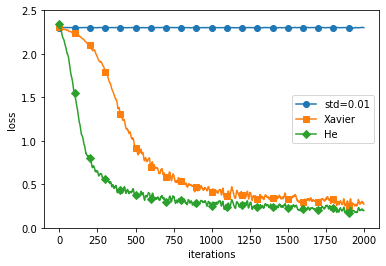

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

## 6.3 배치 정규화

## 6.3.2 배치 정규화의 효과

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list

============== 1/16 ==============
epoch:0 | 0.094 - 0.083


/content/drive/MyDrive/Colab Notebooks/밑바닥부터 시작하는 딥려닝/deep-learning-from-scratch-master/common/multi_layer_net_extend.py:104: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
/content/drive/MyDrive/Colab Notebooks/밑바닥부터 시작하는 딥려닝/deep-learning-from-scratch-master/common/multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)


epoch:1 | 0.097 - 0.088
epoch:2 | 0.097 - 0.109
epoch:3 | 0.097 - 0.148
epoch:4 | 0.097 - 0.168
epoch:5 | 0.097 - 0.186
epoch:6 | 0.097 - 0.199
epoch:7 | 0.097 - 0.22
epoch:8 | 0.097 - 0.243
epoch:9 | 0.097 - 0.254
epoch:10 | 0.097 - 0.274
epoch:11 | 0.097 - 0.294
epoch:12 | 0.097 - 0.303
epoch:13 | 0.097 - 0.314
epoch:14 | 0.097 - 0.344
epoch:15 | 0.097 - 0.353
epoch:16 | 0.097 - 0.364
epoch:17 | 0.097 - 0.38
epoch:18 | 0.097 - 0.392


epoch:19 | 0.097 - 0.409
============== 2/16 ==============
epoch:0 | 0.092 - 0.084


/content/drive/MyDrive/Colab Notebooks/밑바닥부터 시작하는 딥려닝/deep-learning-from-scratch-master/common/multi_layer_net_extend.py:104: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
/content/drive/MyDrive/Colab Notebooks/밑바닥부터 시작하는 딥려닝/deep-learning-from-scratch-master/common/multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)


epoch:1 | 0.097 - 0.081
epoch:2 | 0.097 - 0.089
epoch:3 | 0.097 - 0.118
epoch:4 | 0.097 - 0.129
epoch:5 | 0.097 - 0.145
epoch:6 | 0.097 - 0.165
epoch:7 | 0.097 - 0.189
epoch:8 | 0.097 - 0.209
epoch:9 | 0.097 - 0.22
epoch:10 | 0.097 - 0.23
epoch:11 | 0.097 - 0.247
epoch:12 | 0.097 - 0.263
epoch:13 | 0.097 - 0.287
epoch:14 | 0.097 - 0.3
epoch:15 | 0.097 - 0.329
epoch:16 | 0.097 - 0.353
epoch:17 | 0.097 - 0.366
epoch:18 | 0.097 - 0.39


epoch:19 | 0.097 - 0.408
============== 3/16 ==============
epoch:0 | 0.127 - 0.163
epoch:1 | 0.349 - 0.162
epoch:2 | 0.506 - 0.188
epoch:3 | 0.631 - 0.224
epoch:4 | 0.706 - 0.261
epoch:5 | 0.759 - 0.299
epoch:6 | 0.794 - 0.328
epoch:7 | 0.839 - 0.357
epoch:8 | 0.881 - 0.382
epoch:9 | 0.905 - 0.418
epoch:10 | 0.92 - 0.441
epoch:11 | 0.934 - 0.465
epoch:12 | 0.953 - 0.499
epoch:13 | 0.963 - 0.514
epoch:14 | 0.971 - 0.54
epoch:15 | 0.977 - 0.569
epoch:16 | 0.983 - 0.577
epoch:17 | 0.984 - 0.605
epoch:18 | 0.988 - 0.618


epoch:19 | 0.989 - 0.627
============== 4/16 ==============
epoch:0 | 0.13 - 0.112
epoch:1 | 0.215 - 0.155
epoch:2 | 0.335 - 0.209
epoch:3 | 0.461 - 0.306
epoch:4 | 0.542 - 0.384
epoch:5 | 0.587 - 0.429
epoch:6 | 0.643 - 0.483
epoch:7 | 0.664 - 0.535
epoch:8 | 0.698 - 0.578
epoch:9 | 0.72 - 0.606
epoch:10 | 0.731 - 0.638
epoch:11 | 0.752 - 0.674
epoch:12 | 0.769 - 0.702
epoch:13 | 0.784 - 0.726
epoch:14 | 0.805 - 0.737
epoch:15 | 0.821 - 0.759
epoch:16 | 0.824 - 0.779
epoch:17 | 0.839 - 0.794
epoch:18 | 0.83 - 0.81


epoch:19 | 0.848 - 0.814
============== 5/16 ==============
epoch:0 | 0.116 - 0.126
epoch:1 | 0.12 - 0.174
epoch:2 | 0.128 - 0.308
epoch:3 | 0.126 - 0.397
epoch:4 | 0.134 - 0.474
epoch:5 | 0.132 - 0.54
epoch:6 | 0.142 - 0.612
epoch:7 | 0.152 - 0.687
epoch:8 | 0.172 - 0.738
epoch:9 | 0.188 - 0.773
epoch:10 | 0.197 - 0.8
epoch:11 | 0.213 - 0.813
epoch:12 | 0.233 - 0.83
epoch:13 | 0.241 - 0.853
epoch:14 | 0.257 - 0.851
epoch:15 | 0.267 - 0.86
epoch:16 | 0.267 - 0.874
epoch:17 | 0.284 - 0.883
epoch:18 | 0.312 - 0.892


epoch:19 | 0.301 - 0.902
============== 6/16 ==============
epoch:0 | 0.089 - 0.094
epoch:1 | 0.091 - 0.152
epoch:2 | 0.118 - 0.428
epoch:3 | 0.113 - 0.59
epoch:4 | 0.117 - 0.663
epoch:5 | 0.117 - 0.703
epoch:6 | 0.116 - 0.722
epoch:7 | 0.116 - 0.751
epoch:8 | 0.116 - 0.774
epoch:9 | 0.116 - 0.799
epoch:10 | 0.116 - 0.819
epoch:11 | 0.116 - 0.839
epoch:12 | 0.116 - 0.857
epoch:13 | 0.116 - 0.873
epoch:14 | 0.116 - 0.887
epoch:15 | 0.116 - 0.904
epoch:16 | 0.116 - 0.916
epoch:17 | 0.116 - 0.922
epoch:18 | 0.116 - 0.933


epoch:19 | 0.116 - 0.942
============== 7/16 ==============
epoch:0 | 0.092 - 0.097
epoch:1 | 0.107 - 0.204
epoch:2 | 0.117 - 0.567
epoch:3 | 0.117 - 0.703
epoch:4 | 0.117 - 0.754
epoch:5 | 0.116 - 0.786
epoch:6 | 0.116 - 0.818
epoch:7 | 0.116 - 0.846
epoch:8 | 0.116 - 0.881
epoch:9 | 0.116 - 0.907
epoch:10 | 0.116 - 0.923
epoch:11 | 0.116 - 0.94
epoch:12 | 0.116 - 0.947
epoch:13 | 0.117 - 0.959
epoch:14 | 0.117 - 0.964
epoch:15 | 0.117 - 0.972
epoch:16 | 0.117 - 0.979
epoch:17 | 0.117 - 0.984
epoch:18 | 0.117 - 0.988


epoch:19 | 0.117 - 0.987
============== 8/16 ==============
epoch:0 | 0.105 - 0.086
epoch:1 | 0.117 - 0.448
epoch:2 | 0.116 - 0.781
epoch:3 | 0.116 - 0.84
epoch:4 | 0.116 - 0.863
epoch:5 | 0.116 - 0.899
epoch:6 | 0.116 - 0.925
epoch:7 | 0.116 - 0.941
epoch:8 | 0.116 - 0.962
epoch:9 | 0.116 - 0.966
epoch:10 | 0.116 - 0.977
epoch:11 | 0.116 - 0.985
epoch:12 | 0.116 - 0.986
epoch:13 | 0.116 - 0.989
epoch:14 | 0.116 - 0.994
epoch:15 | 0.116 - 0.996
epoch:16 | 0.116 - 0.997
epoch:17 | 0.116 - 0.999
epoch:18 | 0.116 - 0.999


epoch:19 | 0.116 - 0.999
============== 9/16 ==============
epoch:0 | 0.094 - 0.116
epoch:1 | 0.116 - 0.363
epoch:2 | 0.116 - 0.722
epoch:3 | 0.116 - 0.772
epoch:4 | 0.116 - 0.816
epoch:5 | 0.116 - 0.849
epoch:6 | 0.116 - 0.883
epoch:7 | 0.116 - 0.895
epoch:8 | 0.116 - 0.916
epoch:9 | 0.116 - 0.957
epoch:10 | 0.116 - 0.988
epoch:11 | 0.116 - 0.994
epoch:12 | 0.116 - 0.998
epoch:13 | 0.116 - 0.997
epoch:14 | 0.116 - 0.999
epoch:15 | 0.116 - 0.998
epoch:16 | 0.116 - 0.999
epoch:17 | 0.116 - 1.0
epoch:18 | 0.116 - 0.999


epoch:19 | 0.116 - 1.0
============== 10/16 ==============
epoch:0 | 0.117 - 0.125
epoch:1 | 0.117 - 0.511
epoch:2 | 0.117 - 0.689
epoch:3 | 0.117 - 0.765
epoch:4 | 0.117 - 0.81
epoch:5 | 0.117 - 0.801
epoch:6 | 0.117 - 0.844
epoch:7 | 0.117 - 0.95
epoch:8 | 0.117 - 0.956
epoch:9 | 0.117 - 0.976
epoch:10 | 0.117 - 0.991
epoch:11 | 0.117 - 0.996
epoch:12 | 0.117 - 0.996
epoch:13 | 0.117 - 0.979
epoch:14 | 0.117 - 0.994
epoch:15 | 0.117 - 0.997
epoch:16 | 0.117 - 0.998
epoch:17 | 0.117 - 0.997
epoch:18 | 0.117 - 0.998


epoch:19 | 0.117 - 0.999
============== 11/16 ==============
epoch:0 | 0.087 - 0.158
epoch:1 | 0.117 - 0.683
epoch:2 | 0.116 - 0.668
epoch:3 | 0.117 - 0.803
epoch:4 | 0.117 - 0.771
epoch:5 | 0.117 - 0.929
epoch:6 | 0.117 - 0.957
epoch:7 | 0.117 - 0.964
epoch:8 | 0.117 - 0.934
epoch:9 | 0.117 - 0.974
epoch:10 | 0.117 - 0.98
epoch:11 | 0.117 - 0.988
epoch:12 | 0.117 - 0.987
epoch:13 | 0.117 - 0.979
epoch:14 | 0.117 - 0.987
epoch:15 | 0.117 - 0.991
epoch:16 | 0.117 - 0.991
epoch:17 | 0.117 - 0.993
epoch:18 | 0.117 - 0.994


epoch:19 | 0.117 - 0.966
============== 12/16 ==============
epoch:0 | 0.116 - 0.193
epoch:1 | 0.116 - 0.438
epoch:2 | 0.116 - 0.62
epoch:3 | 0.116 - 0.651
epoch:4 | 0.116 - 0.68
epoch:5 | 0.116 - 0.687
epoch:6 | 0.116 - 0.698
epoch:7 | 0.116 - 0.701
epoch:8 | 0.116 - 0.703
epoch:9 | 0.117 - 0.708
epoch:10 | 0.117 - 0.68
epoch:11 | 0.117 - 0.776
epoch:12 | 0.117 - 0.8
epoch:13 | 0.117 - 0.797
epoch:14 | 0.117 - 0.811
epoch:15 | 0.117 - 0.861
epoch:16 | 0.117 - 0.854
epoch:17 | 0.117 - 0.864
epoch:18 | 0.117 - 0.884


epoch:19 | 0.117 - 0.859
============== 13/16 ==============
epoch:0 | 0.092 - 0.175
epoch:1 | 0.117 - 0.44
epoch:2 | 0.117 - 0.581
epoch:3 | 0.116 - 0.633
epoch:4 | 0.116 - 0.549
epoch:5 | 0.116 - 0.714
epoch:6 | 0.117 - 0.731
epoch:7 | 0.117 - 0.76
epoch:8 | 0.117 - 0.724
epoch:9 | 0.117 - 0.76
epoch:10 | 0.117 - 0.753
epoch:11 | 0.117 - 0.775
epoch:12 | 0.117 - 0.772
epoch:13 | 0.117 - 0.792
epoch:14 | 0.117 - 0.8
epoch:15 | 0.117 - 0.759
epoch:16 | 0.117 - 0.764
epoch:17 | 0.117 - 0.755
epoch:18 | 0.117 - 0.797


epoch:19 | 0.117 - 0.804
============== 14/16 ==============
epoch:0 | 0.1 - 0.136
epoch:1 | 0.094 - 0.347
epoch:2 | 0.116 - 0.515
epoch:3 | 0.116 - 0.487
epoch:4 | 0.117 - 0.589
epoch:5 | 0.117 - 0.569
epoch:6 | 0.117 - 0.582
epoch:7 | 0.117 - 0.595
epoch:8 | 0.117 - 0.606
epoch:9 | 0.117 - 0.607
epoch:10 | 0.117 - 0.606
epoch:11 | 0.117 - 0.6
epoch:12 | 0.117 - 0.611
epoch:13 | 0.117 - 0.61
epoch:14 | 0.117 - 0.613
epoch:15 | 0.117 - 0.615
epoch:16 | 0.117 - 0.612
epoch:17 | 0.117 - 0.616
epoch:18 | 0.117 - 0.61


epoch:19 | 0.117 - 0.612
============== 15/16 ==============
epoch:0 | 0.116 - 0.098
epoch:1 | 0.116 - 0.296
epoch:2 | 0.116 - 0.479
epoch:3 | 0.116 - 0.485
epoch:4 | 0.117 - 0.497
epoch:5 | 0.116 - 0.503
epoch:6 | 0.116 - 0.504
epoch:7 | 0.116 - 0.597
epoch:8 | 0.116 - 0.601
epoch:9 | 0.116 - 0.604
epoch:10 | 0.116 - 0.528
epoch:11 | 0.116 - 0.592
epoch:12 | 0.116 - 0.608
epoch:13 | 0.116 - 0.61
epoch:14 | 0.116 - 0.614
epoch:15 | 0.116 - 0.613
epoch:16 | 0.116 - 0.606
epoch:17 | 0.116 - 0.614
epoch:18 | 0.116 - 0.615


epoch:19 | 0.116 - 0.617
============== 16/16 ==============
epoch:0 | 0.116 - 0.223
epoch:1 | 0.1 - 0.202
epoch:2 | 0.1 - 0.378
epoch:3 | 0.117 - 0.399
epoch:4 | 0.116 - 0.417
epoch:5 | 0.116 - 0.428
epoch:6 | 0.116 - 0.443
epoch:7 | 0.116 - 0.442
epoch:8 | 0.117 - 0.457
epoch:9 | 0.116 - 0.458
epoch:10 | 0.116 - 0.431
epoch:11 | 0.116 - 0.497
epoch:12 | 0.116 - 0.509
epoch:13 | 0.116 - 0.54
epoch:14 | 0.116 - 0.513
epoch:15 | 0.116 - 0.498
epoch:16 | 0.116 - 0.517
epoch:17 | 0.116 - 0.52
epoch:18 | 0.116 - 0.521
epoch:19 | 0.116 - 0.531


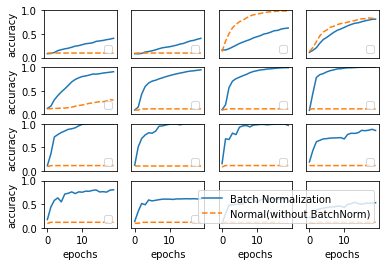

In [15]:
# 그래프 그리기==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    # plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()

## 6.4 바른 학습을 위해

### 6.4.1 오버피팅

In [16]:
(x_train, t_train), (x_test, t_teset) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

epoch:0, train acc:0.09333333333333334, test acc:0.1257
epoch:1, train acc:0.11666666666666667, test acc:0.1454
epoch:2, train acc:0.15666666666666668, test acc:0.1652
epoch:3, train acc:0.18333333333333332, test acc:0.1841
epoch:4, train acc:0.19333333333333333, test acc:0.2001
epoch:5, train acc:0.2633333333333333, test acc:0.2208
epoch:6, train acc:0.30333333333333334, test acc:0.2404
epoch:7, train acc:0.3333333333333333, test acc:0.2622
epoch:8, train acc:0.37, test acc:0.2839
epoch:9, train acc:0.42, test acc:0.3066
epoch:10, train acc:0.46, test acc:0.3235
epoch:11, train acc:0.5133333333333333, test acc:0.3437
epoch:12, train acc:0.5166666666666667, test acc:0.3652
epoch:13, train acc:0.5566666666666666, test acc:0.3851
epoch:14, train acc:0.57, test acc:0.3896
epoch:15, train acc:0.5866666666666667, test acc:0.4096
epoch:16, train acc:0.59, test acc:0.419
epoch:17, train acc:0.6066666666666667, test acc:0.4216
epoch:18, train acc:0.61, test acc:0.4244
epoch:19, train acc:0.62,

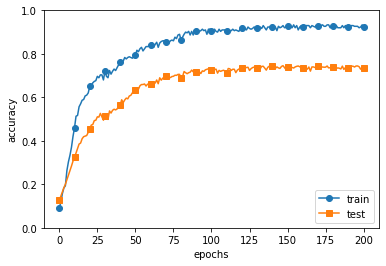

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
# weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### 6.4.3 드롭아웃

In [22]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None
    
    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)
    
    def backward(self, dout):
        return dout * self.mask

train loss:2.2988218346447775
=== epoch:1, train acc:0.10333333333333333, test acc:0.1126 ===
train loss:2.3039344307425256
train loss:2.3218982833240362
train loss:2.3184046972044627
=== epoch:2, train acc:0.10666666666666667, test acc:0.1149 ===
train loss:2.317759512414319
train loss:2.2967596913079205
train loss:2.2834999748316207
=== epoch:3, train acc:0.10666666666666667, test acc:0.1135 ===
train loss:2.3234599367797646
train loss:2.30123239222986
train loss:2.290674914883999
=== epoch:4, train acc:0.10333333333333333, test acc:0.1128 ===
train loss:2.3146483217505325
train loss:2.3115055411814027
train loss:2.3144259010511266
=== epoch:5, train acc:0.1, test acc:0.1126 ===
train loss:2.302865899101959
train loss:2.3067929920132015
train loss:2.2985072709185066
=== epoch:6, train acc:0.10333333333333333, test acc:0.1124 ===
train loss:2.290232522576981
train loss:2.3111336532854727
train loss:2.2917574422580658
=== epoch:7, train acc:0.10666666666666667, test acc:0.1135 ===
trai

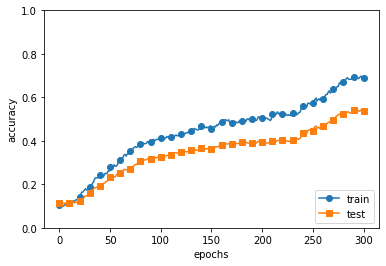

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정 ========================
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

## 6.5 적절한 하이퍼파라미터 값 찾기

### 6.5.1 검증 데이터

In [ ]:
(x_train, t_train), (x_test, t_test) = load_mnist()

# 훈련 데이터를 뒤섞는다.
x_train, t_train = shuffle_dataset(x_train, t_train)
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)

x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[:validation_num]
t_train = t_train[:validation_num]

### 6.5.3 하이퍼파라미터 최적화 구현하기

val acc:0.43 | lr:0.0032090428279901743, weight decay:4.125075384276564e-05
val acc:0.25 | lr:0.0008017373240804788, weight decay:6.397360147178691e-07
val acc:0.11 | lr:0.00017698840966015125, weight decay:5.976125710415682e-08
val acc:0.06 | lr:0.000300062852123284, weight decay:2.093447508130304e-05
val acc:0.05 | lr:9.195447770767663e-05, weight decay:2.0560312277206058e-08
val acc:0.08 | lr:1.9890812787093368e-05, weight decay:6.061335359712928e-07
val acc:0.07 | lr:4.7824466429213225e-06, weight decay:1.1913684118767836e-07
val acc:0.16 | lr:6.726225893631396e-06, weight decay:2.8167130302965754e-08
val acc:0.16 | lr:2.9906046121749718e-05, weight decay:4.234315646031336e-06
val acc:0.08 | lr:2.5776019339070505e-06, weight decay:6.38314175140899e-07
val acc:0.11 | lr:2.2765554884935742e-05, weight decay:4.0313405319019545e-07
val acc:0.08 | lr:0.0002643056182945641, weight decay:6.25621019750833e-05
val acc:0.46 | lr:0.0023539378163886363, weight decay:5.40994143294463e-05
val ac

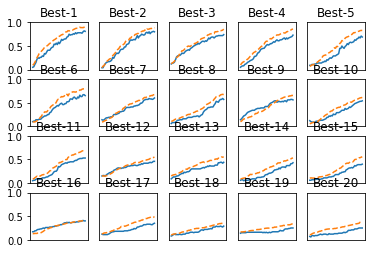

In [24]:
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()